In [2]:
from __future__ import division
import os
import sys
import numpy as np
import pandas as pd
import json
from os.path import join
import matplotlib.image as mpimg

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
EXP_dir = '/Volumes/johnson/BassConnections/glassesMapping/accuracyTests'

In [5]:
calibLogDir = join(EXP_dir, 'calibrationLogs')
dataDir = join(EXP_dir, 'data')

## Load one subjects data from one condition

In [12]:
cond = 'e_0deg'

In [13]:
condData = pd.read_table(join(dataDir, cond, 'output/calibrationProcessed.csv'))

In [14]:
condData.columns

Index([u'vidTS', u'Frame', u'src_X', u'src_Y', u'bg_X', u'bg_Y', u'calib_X',
       u'calib_Y', u'taskTS', u'trialTS', u'col', u'row', u'ptIdx',
       u'distance', u'angle'],
      dtype='object')

In [25]:
condData.head()

,vidTS,Frame,src_X,src_Y,bg_X,bg_Y,calib_X,calib_Y,taskTS,trialTS,col,row,ptIdx,distance,angle
0,24747.87,618.0,883.0,368.0,944.0,1803.0,432.0,880.0,11754.24,509.24,2,5,22,0.65,335
1,24787.85,619.0,882.0,375.0,936.0,1846.0,422.0,935.0,11794.22,549.22,2,5,22,0.81,311
2,24827.83,620.0,881.0,375.0,929.0,1847.0,413.0,936.0,11834.20,589.20,2,5,22,0.78,308
3,24867.81,621.0,882.0,378.0,936.0,1870.0,422.0,965.0,11874.18,629.18,2,5,22,0.95,304
4,24907.79,622.0,881.0,382.0,929.0,1901.0,413.0,1004.0,11914.16,669.16,2,5,22,1.13,295


### isolate a single calibration point

In [15]:
thisPt = condData[condData.ptIdx == 13]

In [24]:
condData.dtypes

vidTS       float64
Frame       float64
src_X       float64
src_Y       float64
bg_X        float64
bg_Y        float64
calib_X     float64
calib_Y     float64
taskTS      float64
trialTS     float64
col           int64
row           int64
ptIdx         int64
distance    float64
angle         int64
dtype: object

In [31]:
def getDistance(x1,y1,x2,y2):
    pixPerDeg = 166.66
    # calculate vector distance between two points, return distance in terms of visual angle
    xDist = x2-x1
    yDist = y2-y1
    distance = (np.sqrt(xDist**2 + (yDist**2)))/pixPerDeg
    return distance

In [27]:
trialData = condData[condData.ptIdx == 13]

In [29]:
centroidX = np.mean(trialData.calib_X)
centroidY = np.mean(trialData.calib_Y)
print centroidX, centroidY

655.96 884.98


In [32]:
distFromCentroid = trialData.apply(lambda d: getDistance(centroidX, centroidY, d['calib_X'], d['calib_Y']), axis=1)
print distFromCentroid

50    1.005055
51    0.986571
52    0.984771
53    0.984771
54    1.013097
55    1.037792
56    1.038918
57    1.072462
58    1.033069
59    0.447858
60    3.854128
61    7.586399
62    3.138483
63    0.199190
64    0.436626
65    0.161887
66    0.310581
67    0.395896
68    0.497939
69    0.492238
70    0.569479
71    0.575359
72    0.560309
73    0.464177
74    0.343864
75    0.258309
76    0.085111
77    0.205482
78    0.205482
79    0.233683
80    0.279336
81    0.295387
82    0.241720
83    0.218432
84    0.199724
85    0.231090
86    0.235974
87    0.245030
88    0.253114
89    0.252521
90    0.166167
91    0.138755
92    0.138719
93    0.161548
94    0.191471
95    0.167307
96    0.173887
97    0.199259
98    0.250394
99    0.195258
dtype: float64


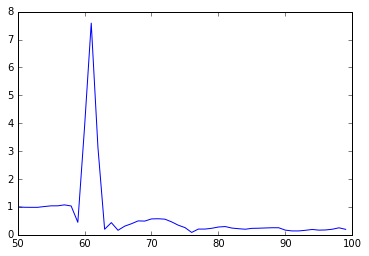

In [33]:
plt.plot(distFromCentroid)

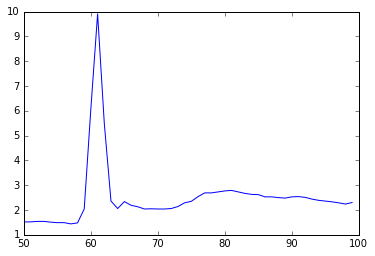

In [37]:
plt.plot(trialData.distance)

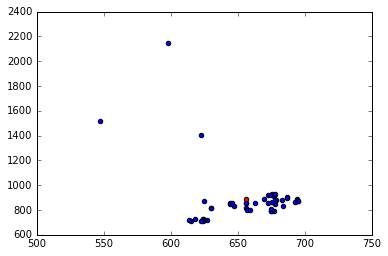

In [36]:
plt.scatter(trialData.calib_X, trialData.calib_Y)
plt.scatter(centroidX, centroidY, c='red')

In [43]:
trialData

,vidTS,Frame,src_X,src_Y,bg_X,bg_Y,calib_X,calib_Y,taskTS,trialTS,col,row,ptIdx,distance,angle
50,30345.13,758.0,900.0,348.0,1100.0,1677.0,627.0,720.0,17351.50,516.50,3,3,13,1.52,300
51,30385.11,759.0,899.0,349.0,1093.0,1681.0,618.0,725.0,17391.48,556.48,3,3,13,1.52,298
52,30425.09,760.0,900.0,349.0,1098.0,1680.0,624.0,724.0,17431.46,596.46,3,3,13,1.54,299
53,30465.07,761.0,900.0,349.0,1098.0,1680.0,624.0,724.0,17471.44,636.44,3,3,13,1.54,299
54,30505.05,762.0,900.0,348.0,1099.0,1676.0,625.0,719.0,17511.42,676.42,3,3,13,1.51,300
55,30545.03,763.0,900.0,347.0,1098.0,1673.0,624.0,715.0,17551.40,716.40,3,3,13,1.49,300
56,30585.01,764.0,900.0,347.0,1097.0,1673.0,623.0,715.0,17591.38,756.38,3,3,13,1.49,300
57,30624.99,765.0,899.0,347.0,1091.0,1670.0,615.0,711.0,17631.36,796.36,3,3,13,1.44,299
58,30664.97,766.0,899.0,348.0,1090.0,1675.0,614.0,718.0,17671.34,836.34,3,3,13,1.48,298
59,30704.95,767.0,901.0,360.0,1102.0,1752.0,630.0,815.0,17711.32,876.32,3,3,13,2.04,292


In [42]:
RMS = np.sqrt(np.sum(np.square(distFromCentroid)) * (1/distFromCentroid.shape[0]))
print RMS

1.38009717716
